# **Exploratory Data Analysis (EDA)**

**1. Setup & Load Data dari Google Drive**


In [20]:
# Mount Google Drive (khusus untuk Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Ganti dengan path file CSV-mu di Google Drive
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'

# Load data
import pandas as pd
df = pd.read_csv(file_path)

# Tampilkan 5 baris awal
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


**2. Informasi Umum Dataset**

In [21]:
# Informasi struktur data
df.info()

# Statistik deskriptif (termasuk data kategorikal)
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Tujuan:

- Mengetahui jumlah baris/kolom

- Tipe data

- Ringkasan statistik numerik & kategorikal



**3. Pembersihan Tipe Data**

Beberapa kolom numerik terbaca sebagai object → konversi ke float.

In [22]:
# Kolom yang seharusnya numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi ke numerik
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek ulang tipe data
df.dtypes


,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


**4. Cek Missing Values, Duplikasi, dan Nilai Unik**

In [23]:
# Missing values
print("Missing Values:\n", df.isnull().sum())

# Duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

# Nilai unik per kolom
print("\nJumlah nilai unik per kolom:\n", df.nunique())


Missing Values:
 Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah data duplikat: 18

Jumlah nilai unik per kolom:
 Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP        

Menampilkan nilai unik setiap kolom

In [30]:
# Tampilkan nilai unik untuk setiap kolom
for col in df.columns:
    print(f"\n- Kolom: {col}")
    print(df[col].unique())



- Kolom: Age
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

- Kolom: Gender
['Female' 'Male' '?' nan]

- Kolom: Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

- Kolom: Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

- Kolom: CALC
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

- Kolom: FAVC
['no' 'yes' '?' nan]

- Kolom: FCVC
[2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.591439   2.392665
 1.123939   2.027574   2.658112   2.88626    2.714447   2.750715
 1.4925     2.205439   2.059138   2.310423   2.823179   2.052932
 2.596364   2.767731   2.815157   2.737762   2.524428   2.971574
 1.0816     1.270448   1.344854   2.959658   2.725282   2.844607
 2.44004    2.432302   2.592247   2.449267   2.929889   2.015258
 1.031149   1.592183   1.21498    1.522001   2.703436   2.362918
 2.14084    2.5596     2.336044   1.813234   2.724285   2.71897
 1.133844 

cek jumlah nilai '?' sebagai missing

In [31]:
# Cek missing value implisit
(df == '?').sum()


,0
Age,0
Gender,13
Height,0
Weight,0
CALC,15
FAVC,11
FCVC,0
NCP,0
SCC,8
SMOKE,8


**5. Visualisasi Distribusi Data**

a. Histogram Kolom Numerik

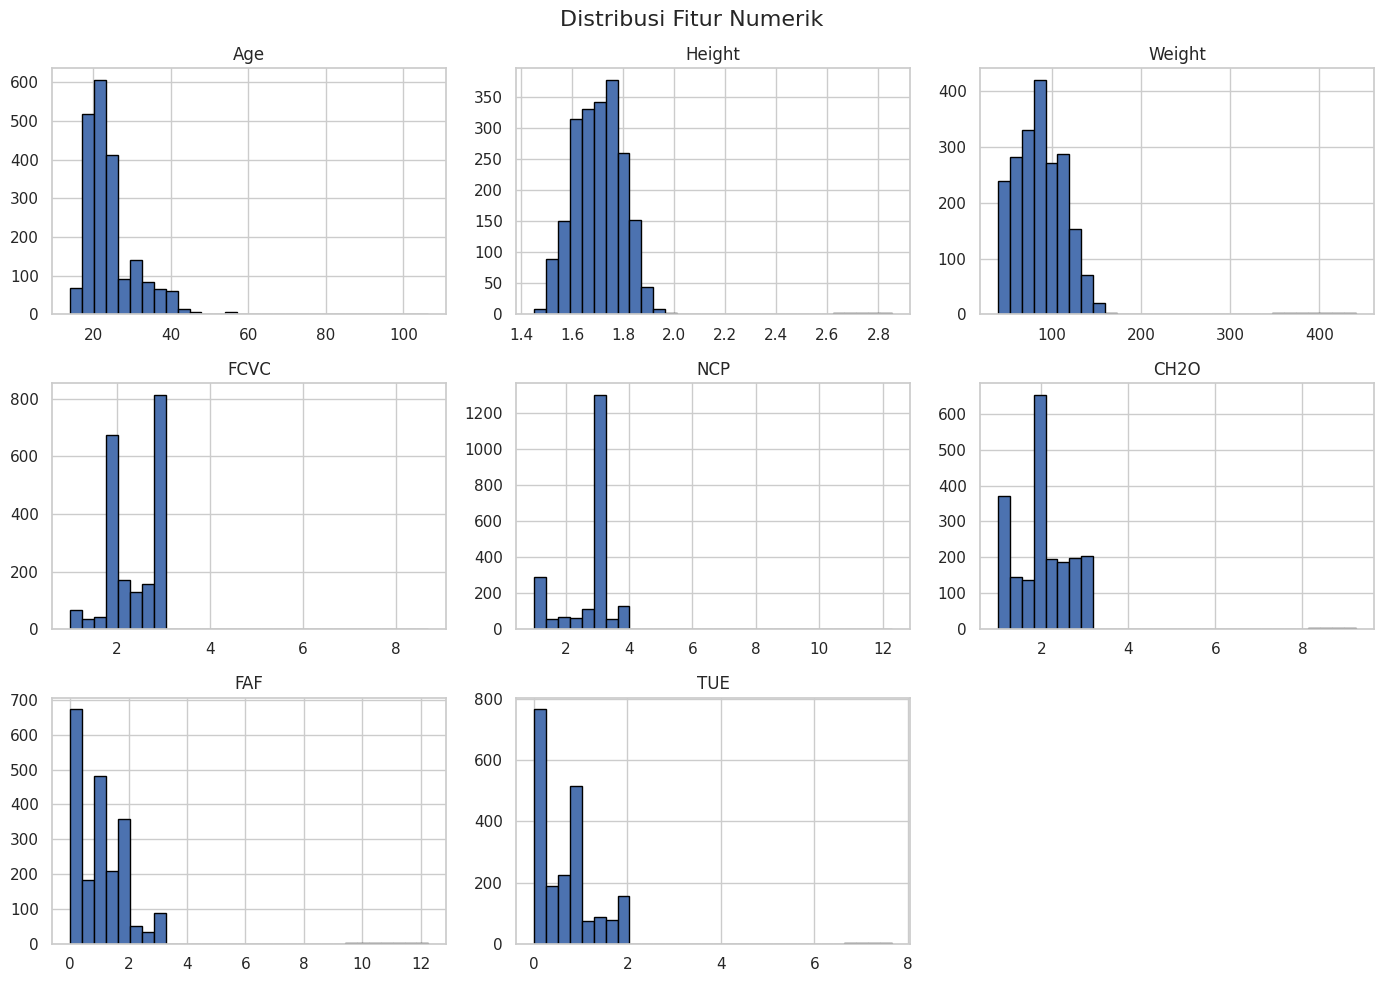

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df[numerical_cols].hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


b. Korelasi Numerik

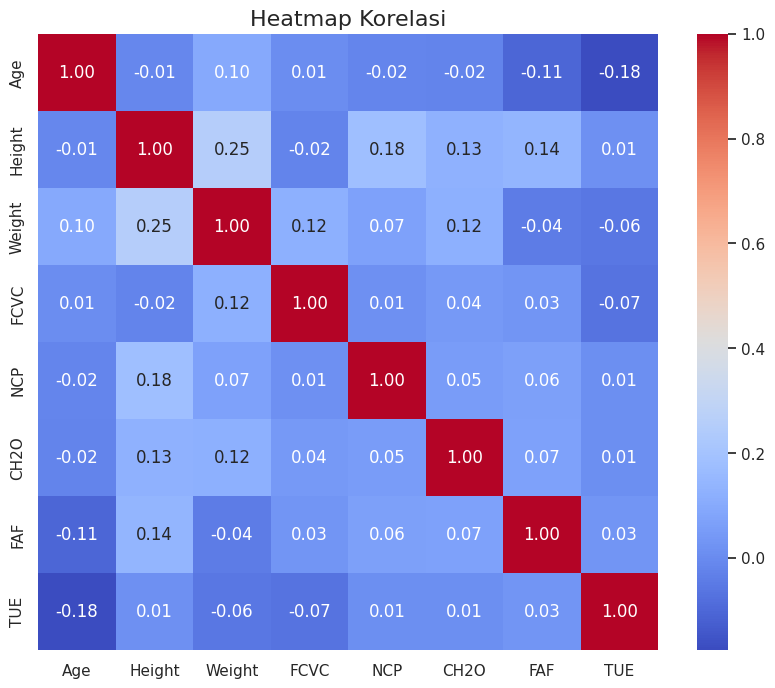

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi", fontsize=16)
plt.show()


c. Distribusi Kelas Target

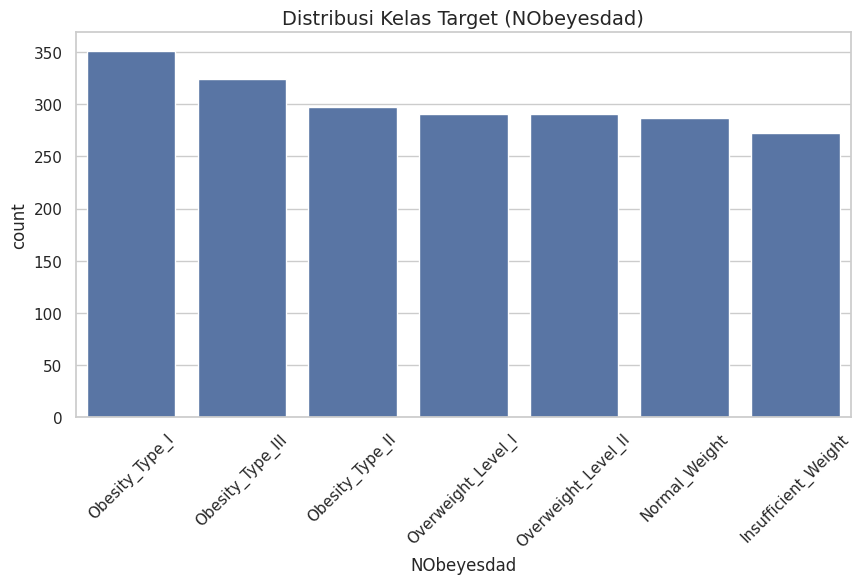

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target (NObeyesdad)", fontsize=14)
plt.show()


 **6. Deteksi Outlier (Boxplot)**

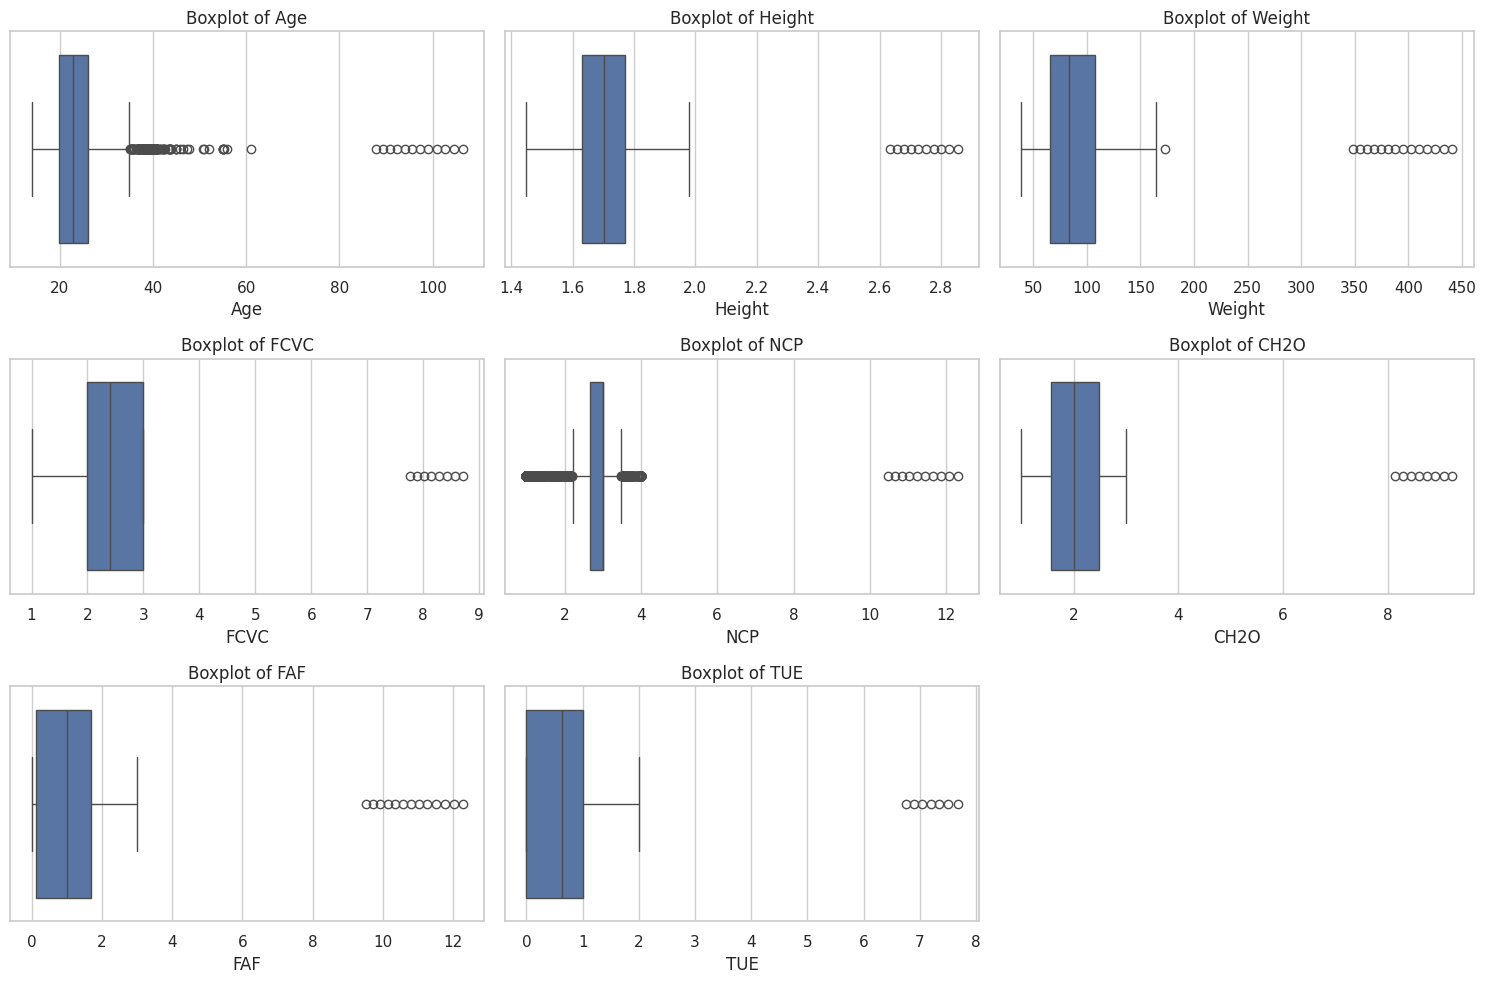

In [27]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**7. Kesimpulan**

Dataset Obesity ini cukup bersih dan informatif, namun membutuhkan beberapa tahap preprocessing sebelum modeling:

- Penanganan missing value (nilai '?' → NaN).

- Deteksi dan penanganan outlier.

- Encoding fitur kategorikal.

- Penyeimbangan kelas target.

- Standarisasi atau normalisasi fitur numerik (karena skala berbeda).